# Week 5 Quiz

## Clarissa Tai - rt2822

### Due Tuesday Oct 11th, 11:59pm

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Sklearn provides a set of commonly used example datasets. 
# They can be accessed through the datasets submodule.
from sklearn import datasets

# We're going to use the Linnerud dataset to practice Regression in sklearn.

# The Linnerud dataset is a tiny multi-output regression dataset. It consists 
# of three excercise (data) and three physiological (target) variables 
# collected from twenty middle-aged men in a fitness club.
linnerud = datasets.load_linnerud()

# The features of the dataset contain data on 3 exercises
# Chins - number of chinups
# Situps - number of situps
# Jumps - number of jumping jacks

# Note that the features and target come as numpy matrices.
# We'll first load the features into a pandas dataframe.
df = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

# We'll also add the target to our dataframe.
# Note also that this dataset contains multiple targets.
# We'll only consider one of them: Weight
df['Weight'] = linnerud.target[:,linnerud.target_names.index('Weight')]

# For more information on the dataset, uncomment the print command below
#print(linnerud.DESCR)

# print the first 3 rows
df.head(3)

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0


<AxesSubplot: xlabel='Situps', ylabel='Weight'>

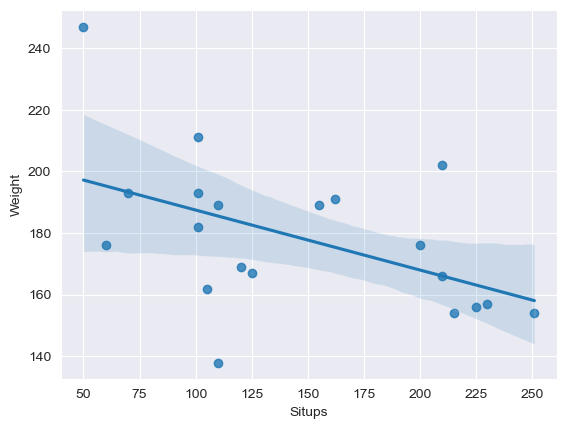

In [3]:
# What is the relationship between Situps and Weight?

# Plot a scatterplot and best-fit line with
#    Situps on the x-asix vs Weight on the y=axis
#    using seaborn sns.regplot()
sns.regplot(df, x='Situps', y='Weight')

In [4]:
# The above plot should indicate a potentially negative relationship 
#    between Situps and Weight
# How much does Weight go down if Situps goes up?
# To answer this we'll train a simple linear model.

# First import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a variable X containing the independent variable 'Situps'
# Note that sklearn expects X to be two dimensional
#   so you must use one of the methods discussed in class
#   to return a two dimensional object
X = df.Situps.values.reshape(-1,1)

# Create a variable y containing the dependent variable 'Weight'
# Note that y should only be one dimensional, 
#    so a Series (single column of a dataframe) works fine here
y = df.Weight

# Instantiate a LinearRegression object with default parameter settings
#   and store as lr
lr = LinearRegression()

# Fit lr using the X and y defined above
lr.fit(X,y)

# Using the learned parameters in coef_,
#   by how much do we expect Weight to go down when Situps goes up by 1?
# Print with a precision of 2
print(f"coef: {lr.coef_[0]:.2f}")

# Using the learned parameter intercept_, 
#   what should we expect weight to be when when Situps is 0?
# Print with a precision of 2
print(f"intercept: {lr.intercept_:.2f}")

coef: -0.19
intercept: 206.92


In [5]:
# How is Weight related to all 3 features?

# Create a list containing the 3 feature names we're interested in 
#    as strings: Chins, Situps, Jumps
# Store as feature_names
# We do this to make sure we don't include 'Weight' in the 
#    regression as an independent variable
feature_names = ['Chins', 'Situps', 'Jumps']

# Instantiate a second LinearRegression model with default parameters
#    and store as mlr
# Fit this model using all of the columns in feature_names and our y from above
mlr = LinearRegression()
mlr.fit(df[feature_names],df.Weight)

# For each feature name in feature_names, print out the name and 
#    corresponding learned coefficient
# It looks like one of the features actually has a positive relationship. 
# Print coefficient values with a precision of 2.
for i in range(3):
    print("{}: {}".format(feature_names[i],np.round(mlr.coef_[i],2)))

Chins: -0.48
Situps: -0.22
Jumps: 0.09


In [6]:
# NOT REQUIRED

# For those that are interested exploring how statsmodels works

# Import the statsmodels api as sm
import statsmodels.api as sm

# Store the 3 features from df as X
X = df[['Chins', 'Situps', 'Jumps']]

# Add a constant to X (in order to learn the bias term) using sm.add_constant()
sm.add_constant(X)

# Instantiate and fit an OLS model using X and df.Weight as y 
#   and store as sm_model
# Note that in OLS, the target y is the first parameter!
sm_model = sm.OLS(df.Weight,X).fit()

# Display the model summary
# Note that the coefficients in the summary match the values
#    found above using sklearn
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.791
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              21.50
Date:                Tue, 11 Oct 2022   Prob (F-statistic):                    5.07e-06
Time:                        16:17:54   Log-Likelihood:                         -116.59
No. Observations:                  20   AIC:                                      239.2
Df Residuals:                      17   BIC:                                      242.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Chins          1.6422      5.376      0.305      0.764      -9.701      12.985
Situps         0.9735      0.442      2.201      0.042       0.041       1.906
Jumps         -0.1295      0.535     -0.242      0.812      -1.259       1.000
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.412
Skew:                           0.185   Prob(JB):                        0.814
Kurtosis:                       2.402   Cond. No.                         47.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""